# **CSC Assignment: Brain MRI Image Processing**
This contains the codes and some documentation of the image Analyzing Process.
# **Introduction**
In this notebook, we will perform various image processing tasks on Brain MRI scans. The images are provided in DICOM format. The tasks include displaying the images, fusing them, applying Fourier transforms, enhancing edges, and rotating the images.\
**MRI image Source:**  [Siemens Healthineers - Pediatric Phoenix Images for MAGNETOM Skyra Brain
](https://www.magnetomworld.siemens-healthineers.com/clinical-corner/protocols/dicom-images/pediatric-phoenix-images-for-magnetom-skyra-brain.html)

**Source Codes:**  [Github Link
](https://github.com/AdebayoIbrahim/BRIimageProcessing)


(1)

# **Load and Display MRI Brain Images**

  ## **Objective**

* To load and display two Brain MRI images from DICOM format.including information about the image source




In [2]:
#first mount drive to have file access or we can run locally
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#NOTE that part of the library used are not instaled by default example `PYDICOM AND SCIPY` , run this to install in colab
!pip install pydicom scipy
#Good, Lets Continue!

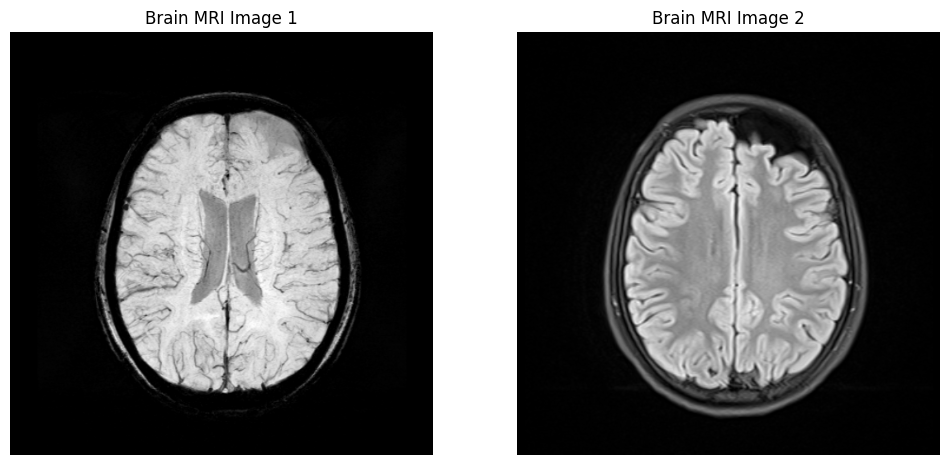

Images were obtained from the following source:
Siemens Healthineers - Pediatric Phoenix Images for MAGNETOM Skyra Brain
URL: https://www.magnetomworld.siemens-healthineers.com/clinical-corner/protocols/dicom-images/pediatric-phoenix-images-for-magnetom-skyra-brain.html


In [7]:
#import necessary libraries and load DCOM images using pydicom library to get read the DCOM MRI image
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM images
image1 = pydicom.dcmread('/content/drive/MyDrive/CSCcode/BRAIN_MRI_1.dcm').pixel_array
image2 = pydicom.dcmread('/content/drive/MyDrive/CSCcode/BRAIN_MRI_2.dcm').pixel_array

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Brain MRI Image 1')
plt.axis('off')
#second image display
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Brain MRI Image 2')
plt.axis('off')
plt.show()

# Documentation on source
print("Images were obtained from the following source:")
print("Siemens Healthineers - Pediatric Phoenix Images for MAGNETOM Skyra Brain")
print("URL: https://www.magnetomworld.siemens-healthineers.com/clinical-corner/protocols/dicom-images/pediatric-phoenix-images-for-magnetom-skyra-brain.html")



 **Description** \
We load the MRI images using the pydicom library and display them side-by-side using matplotlib. This helps in visually comparing the two images.

**(2)**
 # **Fuse the Two MRI Images**
  **Objective** \
To combine the two images by averaging their pixel values.

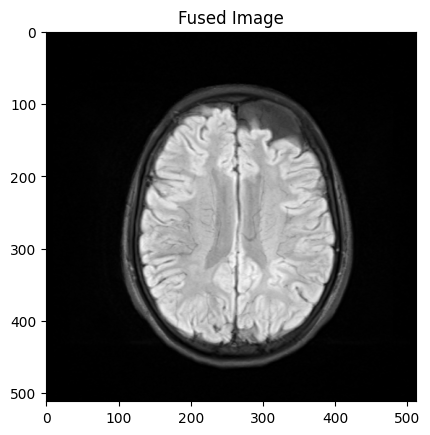

In [8]:
# Fuse the images by averaging pixel values
fused_image = (image1 + image2) / 2

# Display the fused image
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')
plt.show()


**Description** \
We fuse the images by averaging the pixel values of the corresponding pixels in both images. This method helps in blending the features from both images into a single composite image.

**(3)**
 # **Apply Fourier Transform**
  **Objective** \
To transform both images into the frequency domain using the Fourier transform and display the results.

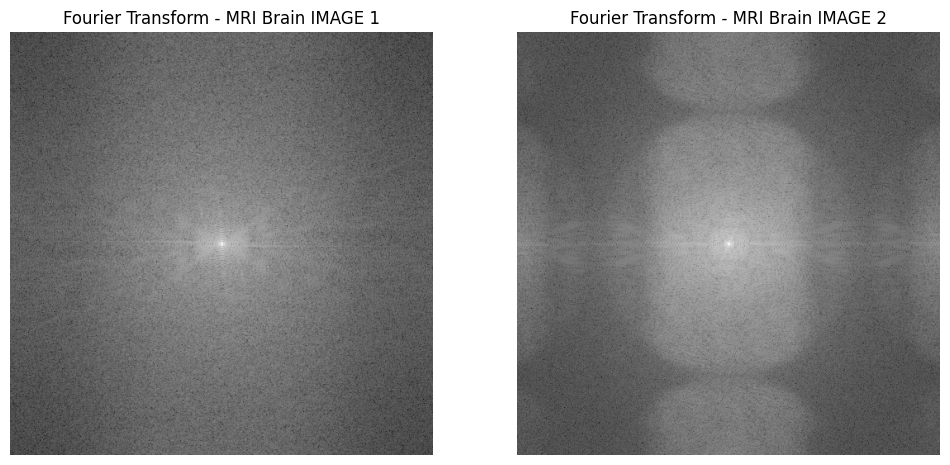

In [9]:
import numpy as np
from numpy.fft import fft2, fftshift

# Apply Fourier Transform
f_transform_image1 = fft2(image1)
f_transform_image2 = fft2(image2)

# Shift zero frequency components to the center
f_transform_image1 = fftshift(f_transform_image1)
f_transform_image2 = fftshift(f_transform_image2)

# Display Fourier Transformed Images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(f_transform_image1)), cmap='gray')
plt.title('Fourier Transform - MRI Brain IMAGE 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(f_transform_image2)), cmap='gray')
plt.title('Fourier Transform - MRI Brain IMAGE 2')
plt.axis('off')

plt.show()


**Description** \
The Fourier transform converts images from the spatial domain to the frequency domain, allowing us to analyze the frequency components of the images. The fftshift function is used to center the zero frequency components.

**(4)**
 # **Apply Edge Enhancement**
  **Objective** \
To enhance the edges in both images using the Sobel filter fron scipy nd image.

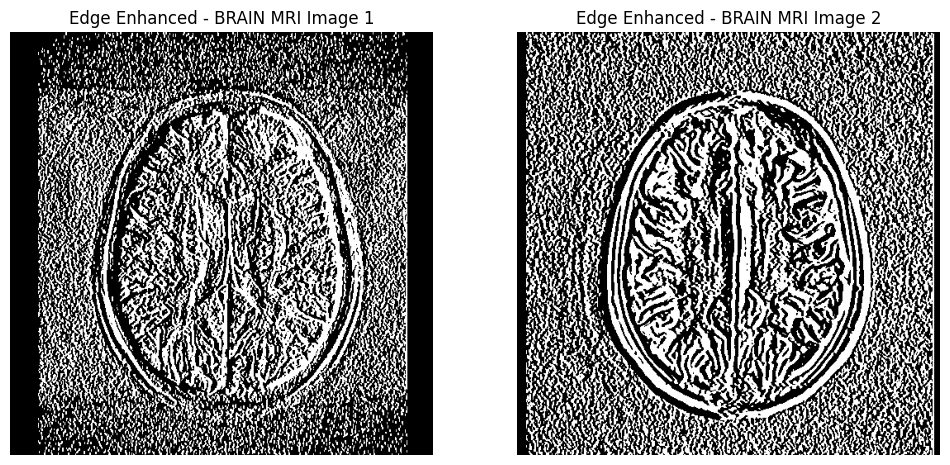

In [11]:
from scipy import ndimage

# Apply Sobel filter for edge enhancement
edges1 = ndimage.sobel(image1)
edges2 = ndimage.sobel(image2)

# Display edge-enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges1, cmap='gray')
plt.title('Edge Enhanced - BRAIN MRI Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges2, cmap='gray')
plt.title('Edge Enhanced - BRAIN MRI Image 2')
plt.axis('off')

plt.show()


**Description** \
The Sobel filter is applied to enhance the edges in the images, making it easier to detect boundaries and structural details., ***Meanwhile we can use som other libraries like opencv fro this***

**(5)**
 # **Rotate the Images**
  **Objective** \
To rotate both images by 45 degrees and display the rotated images.

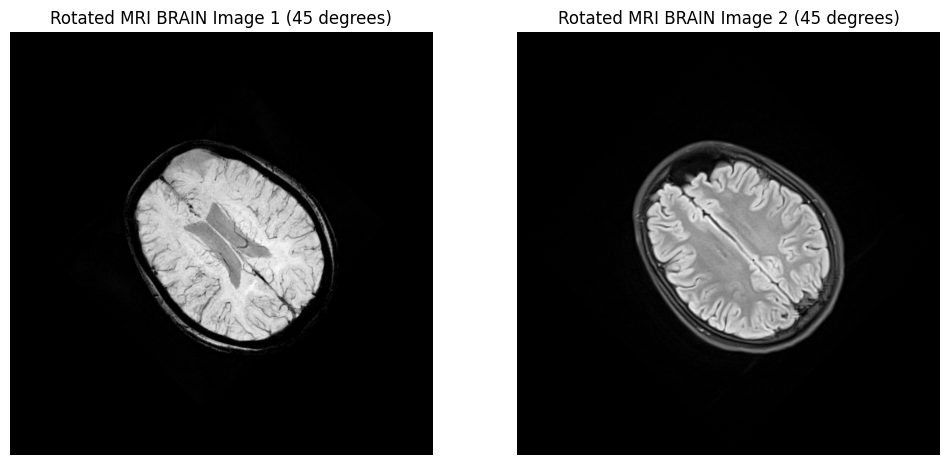

In [12]:
from scipy.ndimage import rotate

# Rotate images by 45 degrees
rotated_image1 = rotate(image1, 45)
rotated_image2 = rotate(image2, 45)

# Display rotated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image1, cmap='gray')
plt.title('Rotated MRI BRAIN Image 1 (45 degrees)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image2, cmap='gray')
plt.title('Rotated MRI BRAIN Image 2 (45 degrees)')
plt.axis('off')

plt.show()


**Description** \
TThe images are rotated by 45 degrees to demonstrate the rotation transformation. This can be useful for analyzing how image features align or change with rotation.

# **CONCLUSION**
In this notebook, we have successfully completed several image processing tasks on Brain MRI images. Each task helps to explore different aspects of image analysis and manipulation.



In [13]:
# Source Sode
# https://github.com/AdebayoIbrahim/BRIimageProcessing